# Project Euler question 114 and 115

Question 115 is a generalized version of question 114. 

Let F(m, n) be the number of combination, m is the minimum size of red block and n is the total number of blocks. Question 114 is calculating F(3, 50) and question 115 is calculating the minimum value of n such that F(50, n) > 1000000. The following function is the formulation of F(m, n)

In [1]:
def counting_block_combinations(m: int, n: int) -> int:
    if m > n:
        return 1
    dp = [1 for _ in range(n+1)]
    # initial parameter
    for i in range(1, m):
        dp[i] = 1
    dp[m] = 2
    # start dynamic programming
    for i in range(m+1, n+1):
        # consider different size of first red block
        for size in range(m, i):
            # s_idx is start index
            # given the size of first red block, calculate the combination of rest of the block
            for s_idx in range(i-size+1):
                # -1 have to applied due to at least one grey block separating two red block
                # we don't have the result of dp[-1], signing maximum function make sure the dp_left >= 0
                dp_left = max(i - s_idx - size - 1, 0)
                dp[i] += dp[dp_left]
        dp[i] += 1
    return dp[n]

In [2]:
# solving question 114
assert counting_block_combinations(3, 7) == 17
assert counting_block_combinations(3, 50) == 16475640049

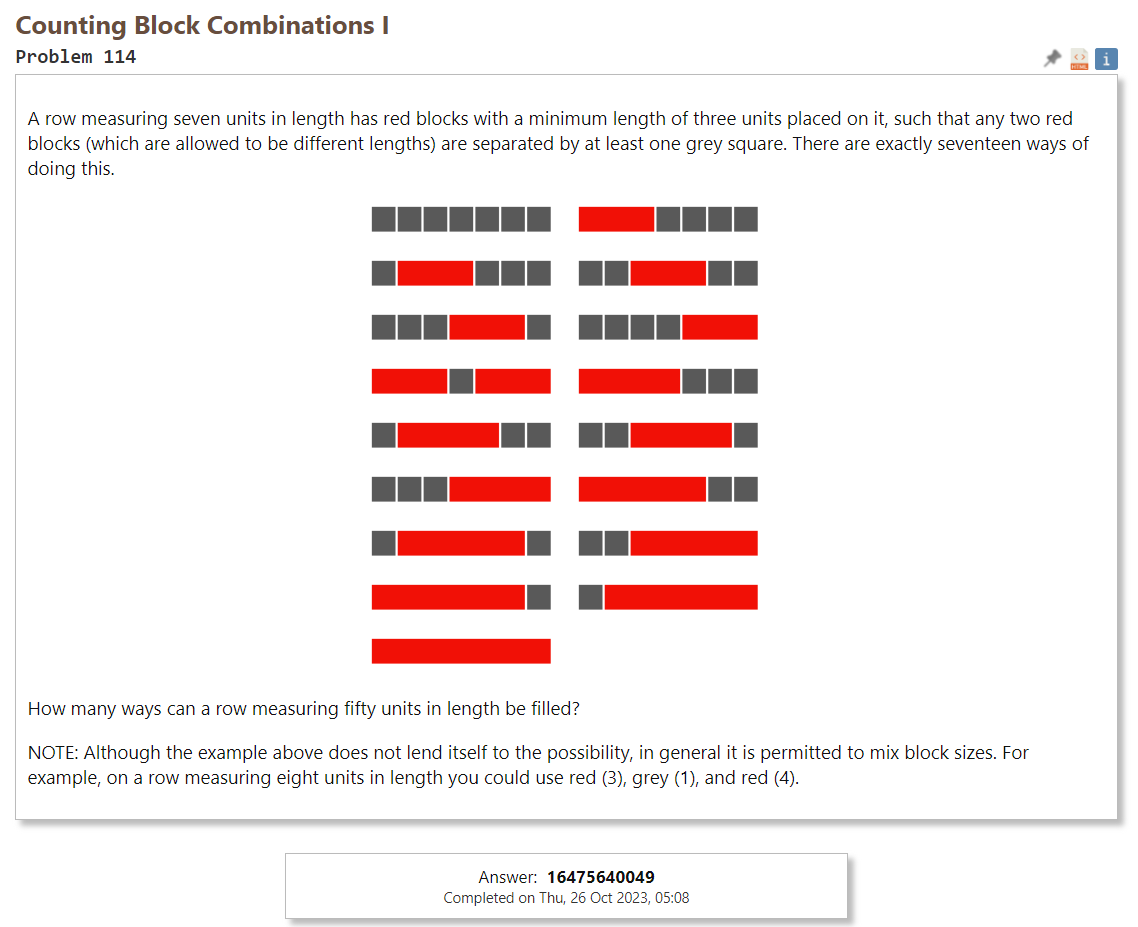

In [3]:
# solving question 115
m = 50
n = 50
exceed_target = 1000000
while counting_block_combinations(m, n) <= exceed_target:
    n += 1
print(n)

168


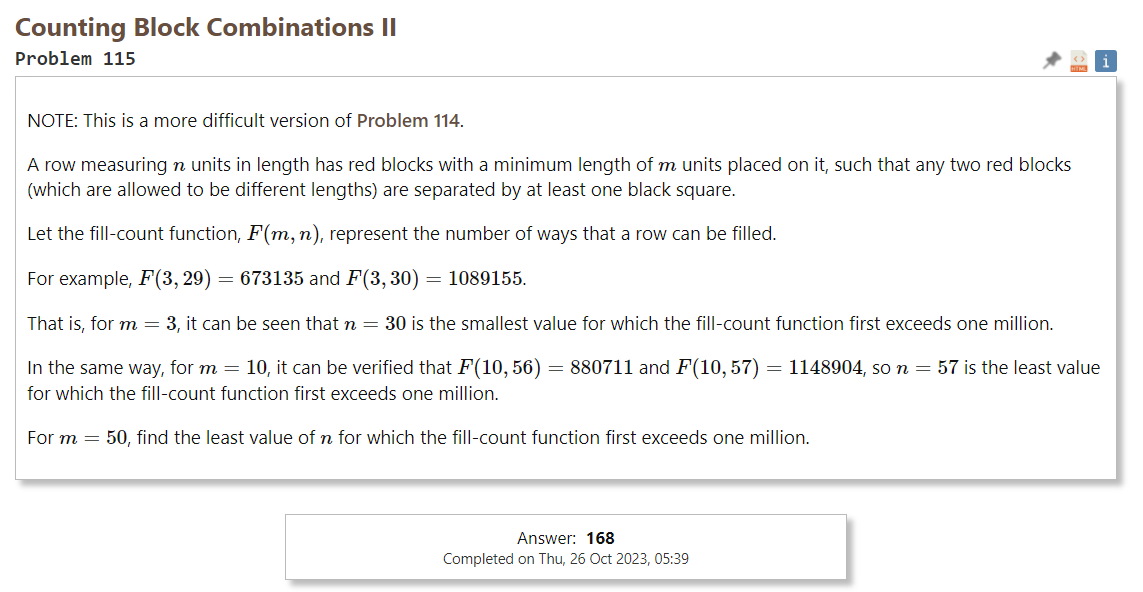

But why is function is the correct formulation of this problem? The first idea is exactly how computer scientist solving problems, split big problem into smaller problem. This technique is named as dynamic programming. Let break down F(3, 7) as an example.

In [4]:
# When n = m, we can only have two combination, all filled with red or grey
# F(3, 3) = cardinality(GGG, RRR) = 2

# so while calculating F(3, n), we have to consider two factors i.e. size and position of first red block.
# One of the case in F(3, 29) with size first red block = 5 and position = 6 (first index = 0)
#   GGGGGGRRRRRG?????????????????
#               ^               ^ the combination of rest of the ? = F(3, 17)

So finally you know three foor loops are representing different scenerio and the array dp is storing the previous result.

dp\[i\] = F(m, i)

Hope you enjoy the approach to this problem. Please let me know if you have more idea and I would like to have discussion with anyone who love computational problem.